In [62]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Importing the dataset
dataset = pd.read_csv('listings.csv')
dataset.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,161,2024-09-07,0.84,2,177,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,66.0,2,210,2025-02-02,1.18,10,317,16,Exempt
2,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.57,2,0,0,STR -OPLI-19-002622
3,25002,Beautiful Private Spot in North Ballard,102684,Amanda,Ballard,Whittier Heights,47.67947,-122.37196,Entire home/apt,86.0,2,1101,2025-02-28,6.07,1,104,59,STR-OPLI-19-002617
4,119103,Teeny Tiny Guestyhouse!,601600,Hal,Other neighborhoods,Fremont,47.65244,-122.35108,Entire home/apt,83.0,3,574,2025-02-17,3.43,2,345,29,STR-OPLI-19-000772


In [26]:
selected_columns = [
    'room_type', 'neighbourhood_group', 'minimum_nights',
    'number_of_reviews', 'reviews_per_month', 'availability_365', 'price'
]
selected_columns

['room_type',
 'neighbourhood_group',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365',
 'price']

In [27]:
dataset = dataset[selected_columns].copy()
dataset.isnull().sum()
dataset = dataset.dropna(subset=['price'])
dataset

,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
0,Entire home/apt,Other neighborhoods,30,161,0.84,177,99.0
1,Private room,Other neighborhoods,2,210,1.18,317,66.0
3,Entire home/apt,Ballard,2,1101,6.07,104,86.0
4,Entire home/apt,Other neighborhoods,3,574,3.43,345,83.0
6,Private room,Magnolia,1,387,2.38,138,49.0
...,...,...,...,...,...,...,...
6767,Private room,Queen Anne,1,0,NaN,70,36.0
6768,Entire home/apt,Capitol Hill,3,0,NaN,93,81.0
6769,Entire home/apt,Queen Anne,2,0,NaN,287,127.0
6770,Entire home/apt,Queen Anne,2,0,NaN,290,127.0


In [28]:
dataset['price_class'] = np.where(dataset['price'] > 100, 1, 0)  # 1 = expensive, 0 = cheap
X = dataset[['minimum_nights', 'number_of_reviews']].values
y = dataset['price_class'].values

Training and Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
#FEATURE SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [31]:
#Fit logistic model
classifier = LogisticRegression(random_state=0)

#fitting the model
classifier.fit(X_train, y_train)

#predicting
y_pred = classifier.predict(X_test)


Evaluation metrix for classification

Accuracy :  0.6617842876165113
Precision :  0.6628455832771409
Recall :  0.9919273461150353


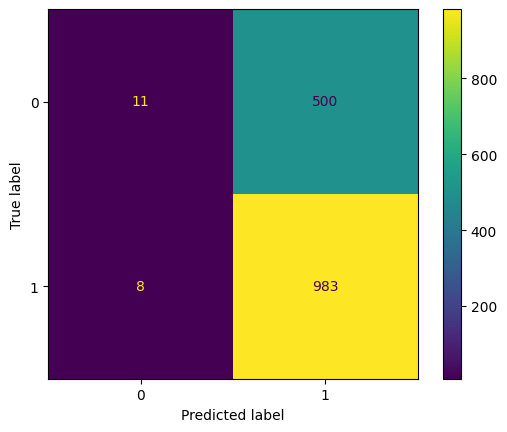

In [40]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print('Accuracy : ',accuracy)
print('Precision : ', precision)
print('Recall : ',recall)

In [42]:
x_Set , y_set = X_train, y_train
x_Set

array([[-0.4890293 , -0.15573859],
       [-0.54212088,  2.07511061],
       [-0.54212088, -0.60034839],
       ...,
       [-0.54212088, -0.54574719],
       [ 0.99753494, -0.39754392],
       [-0.4890293 ,  0.28107105]], shape=(4506, 2))

MESHGRID

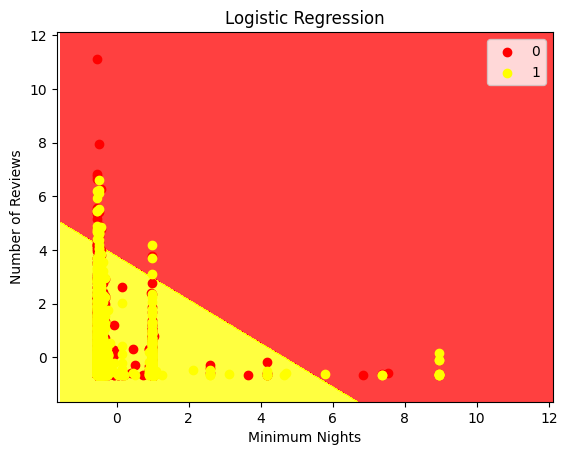

In [50]:
x1, x2 = np.meshgrid(np.arange(start = x_Set[:,0].min() - 1, stop = x_Set[:,0].max() + 1, step = 0.01),
            np.arange(start = x_Set[:,1].min() - 1, stop = x_Set[:,1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha =0.75, 
                                        cmap = ListedColormap(('red', 'yellow')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_Set[y_set == j,0], x_Set[y_set == j, 1], color = ListedColormap(('red','yellow'))(i), label = j)

plt.title('Logistic Regression')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


DECISION TREE

In [55]:
classifier1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier1.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
y_pred = classifier1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm


array([[176, 335],
       [260, 731]])

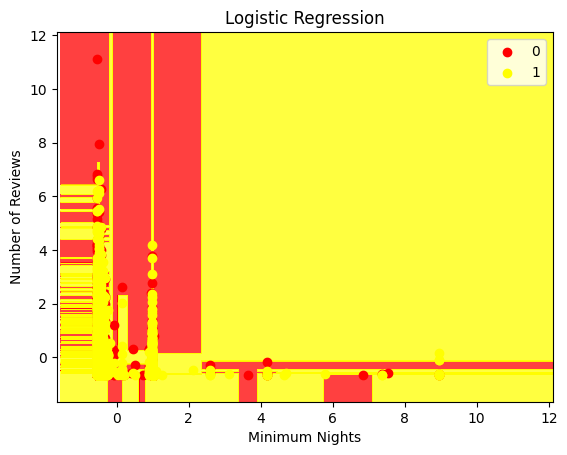

In [61]:
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_Set[:,0].min() - 1, stop = x_Set[:,0].max() + 1, step = 0.01),
            np.arange(start = x_Set[:,1].min() - 1, stop = x_Set[:,1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier1.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha =0.75, 
                                        cmap = ListedColormap(('red', 'yellow')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_Set[y_set == j,0], x_Set[y_set == j, 1], color = ListedColormap(('red','yellow'))(i), label = j)

plt.title('Logistic Regression')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

KNN (K-Nearest Neighbor)  CLASSIFIER

In [63]:
classifier2 = KNeighborsClassifier(n_neighbors= 5 , metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [64]:
#predict
y_pred = classifier2.predict(X_test)

In [65]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[164, 347],
       [228, 763]])

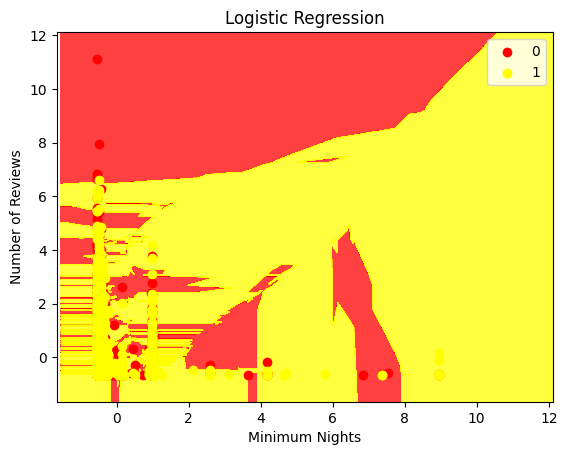

In [66]:
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_Set[:,0].min() - 1, stop = x_Set[:,0].max() + 1, step = 0.01),
            np.arange(start = x_Set[:,1].min() - 1, stop = x_Set[:,1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier2.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha =0.75, 
                                        cmap = ListedColormap(('red', 'yellow')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_Set[y_set == j,0], x_Set[y_set == j, 1], color = ListedColormap(('red','yellow'))(i), label = j)

plt.title('Logistic Regression')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()